
# **Machine Problem 3: Implementing a Logical Based-Model in Python**


### Name: Vanesse V. Reyes
### Section: BSCS - 3BIS
### Course: CCST 101 | Advance Representation and Reasoning
### Topic 2.1: Introduction to Probability AI


# **Machine Problem 3: Interactive Probability and Decision-Decision Making in AI**

In [5]:
# @title # **Part 1: Basic Probability Calculations**

def joint_prob(p_A, p_B):
    """Calculate joint probability of two independent events."""
    if not (0 <= p_A <= 1 and 0 <= p_B <= 1):
        return "Error: Probabilities must be between 0 and 1."
    return p_A * p_B

def marginal_prob(p_A, p_B):
    """Calculate marginal probability of either event occurring."""
    jp = joint_prob(p_A, p_B)
    if isinstance(jp, str):
        return jp
    return p_A + p_B - jp

def conditional_prob(jp, p_A):
    """Calculate conditional probability P(B|A)."""
    if p_A == 0:
        return "Error: P(A) cannot be zero."
    return jp / p_A

# Input probabilities for events
prob_A = 0.6  # Probability of Event A
prob_B = 0.3  # Probability of Event B

# Calculate probabilities
def calculate_probabilities():
    jp = joint_prob(prob_A, prob_B)
    mp = marginal_prob(prob_A, prob_B)

    if isinstance(jp, float) and prob_A > 0:
        cp = conditional_prob(jp, prob_A)
    else:
        cp = "Cannot compute conditional probability due to invalid inputs."

    print(f"Joint Probability P(A and B): {jp}")
    print(f"Marginal Probability P(A or B): {mp}")
    print(f"Conditional Probability P(B|A): {cp}")

# Execute the calculations
calculate_probabilities()

Joint Probability P(A and B): 0.18
Marginal Probability P(A or B): 0.72
Conditional Probability P(B|A): 0.3


In [6]:
# @title # **Part 2: Bayesian Inference for Disease Diagnosis**

def bayesian_inference(prior, likelihood, p_positive):
    """Calculate the posterior probability of having a disease given a positive test result."""
    return (likelihood * prior) / p_positive

# Input probabilities for Bayesian inference
prior_disease = 0.01  # Prior probability of having the disease
likelihood_positive = 0.90  # Likelihood of a positive test given the disease
p_positive_test = 0.05  # Total probability of a positive test

# Function to calculate and display the posterior probability
def calculate_posterior():
    """Calculate the posterior probability based on user-defined inputs."""
    try:
        posterior = bayesian_inference(prior_disease, likelihood_positive, p_positive_test)
        print(f"Posterior Probability of having the disease given a positive test result: {posterior:.4f}")
    except ZeroDivisionError:
        print("Error: The total probability of a positive test cannot be zero.")

# Execute the calculation
calculate_posterior()

Posterior Probability of having the disease given a positive test result: 0.1800


Average return after 1000 trials: $542.50


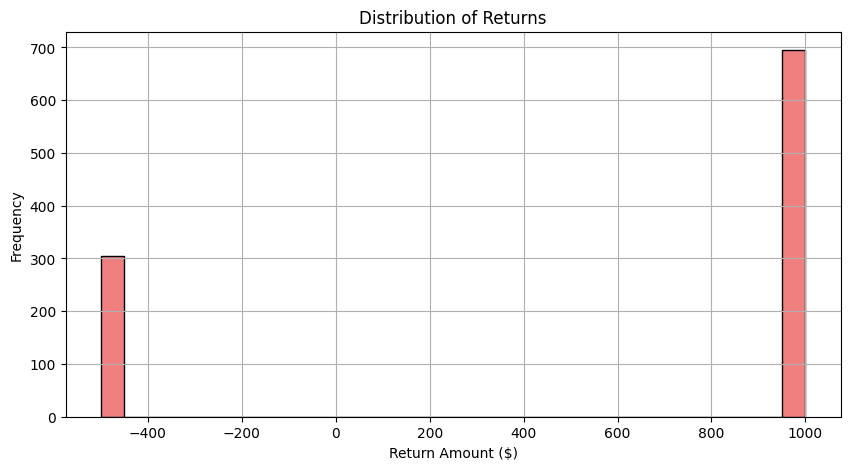

In [7]:
# @title # **Part 3: Decision-Making Simulation Under Uncertainty**

import numpy as np
import matplotlib.pyplot as plt

def simulate_decision(trials, success_prob, success_reward, failure_penalty):
    """Simulate decision-making with uncertain outcomes and calculate average return."""
    returns = []

    for _ in range(trials):
        if np.random.rand() < success_prob:
            returns.append(success_reward)  # Success
        else:
            returns.append(failure_penalty)  # Failure

    average_return = np.mean(returns)
    return average_return, returns

# Input parameters for the simulation
num_trials = 1000
p_success = 0.7
reward_success = 1000
penalty_failure = -500

# Run the simulation
avg_return, trial_returns = simulate_decision(num_trials, p_success, reward_success, penalty_failure)

# Display the result
print(f"Average return after {num_trials} trials: ${avg_return:.2f}")

# Visualize the distribution of returns
plt.figure(figsize=(10, 5))
plt.hist(trial_returns, bins=30, edgecolor='black', color='lightcoral')  # Changed color to light coral
plt.title('Distribution of Returns')
plt.xlabel('Return Amount ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

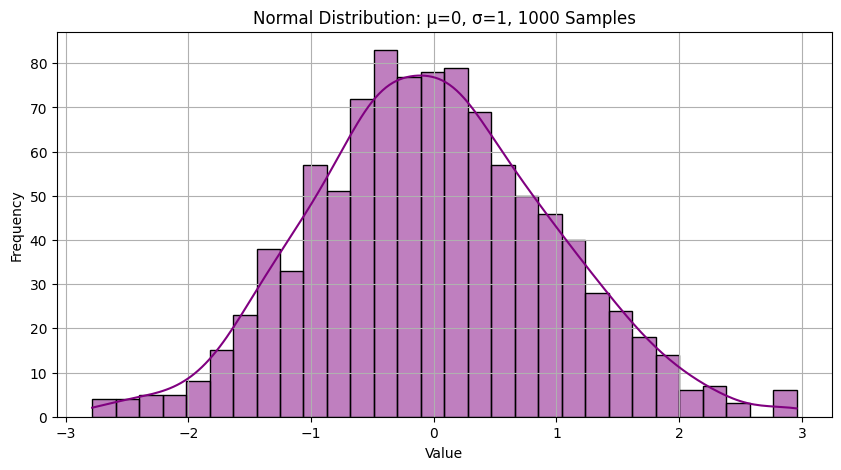

In [8]:
# @title # **Part 4: Visualize Probability Distributions**

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_binomial(trials, p_head, simulations):
    """Simulate a binomial distribution of coin flips."""
    return np.random.binomial(n=trials, p=p_head, size=simulations)

def simulate_normal(mean, std_dev, size):
    """Simulate a normal distribution with specified mean and standard deviation."""
    return np.random.normal(mean, std_dev, size)

# User selects a distribution to simulate
distribution = "Normal"  #@param ["Binomial", "Normal"]

if distribution == "Binomial":
    # Inputs for binomial distribution
    num_trials = 10
    p_head = 0.5
    num_simulations = 1000

    # Simulate and visualize binomial distribution
    outcomes_binomial = simulate_binomial(num_trials, p_head, num_simulations)
    plt.figure(figsize=(10, 5))
    sns.histplot(outcomes_binomial, bins=num_trials + 1, kde=False, color='orange', edgecolor='black')  # Changed color to orange
    plt.title(f'Binomial Distribution: {num_trials} Trials, {num_simulations} Simulations, p={p_head}')
    plt.xlabel('Number of Heads')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

elif distribution == "Normal":

    mu = 0
    sigma = 1
    sample_size = 1000

    # Simulate and visualize normal distribution
    outcomes_normal = simulate_normal(mu, sigma, sample_size)
    plt.figure(figsize=(10, 5))
    sns.histplot(outcomes_normal, bins=30, kde=True, color='purple', edgecolor='black')  # Changed color to purple
    plt.title(f'Normal Distribution: μ={mu}, σ={sigma}, {sample_size} Samples')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

else:
    print("Invalid choice. Please select either 'Binomial' or 'Normal'.")

In [10]:
# @title # **Part 5: Rain Prediction Based on Weather Conditions**

def estimate_rain_probability(humidity_level, cloud_cover_level, high_humidity_rain_prob=0.8, high_cloud_cover_rain_prob=0.7):
    """
    Estimates the likelihood of rain based on humidity and cloud cover levels.

    Args:
    - humidity_level (float): Humidity (0 to 1).
    - cloud_cover_level (float): Cloud cover (0 to 1).
    - high_humidity_rain_prob (float): Probability of rain with high humidity.
    - high_cloud_cover_rain_prob (float): Probability of rain with high cloud cover.

    Returns:
    - float: Estimated probability of rain.
    """
    if not (0 <= humidity_level <= 1) or not (0 <= cloud_cover_level <= 1):
        return "Error: Humidity and cloud cover must be between 0 and 1."

    # Calculate rain probability as a weighted average
    rain_probability = (high_humidity_rain_prob * humidity_level + high_cloud_cover_rain_prob * cloud_cover_level) / 2

    return rain_probability

# User Input Section
# @markdown ## **Input Humidity and Cloud Cover Values (`between 0 and 1`):**
humidity_input = 0.8  #@param {type:"number"} # Humidity level
cloud_cover_input = 0.6  #@param {type:"number"} # Cloud cover level

# Predict the probability of rain based on inputs
rain_chance = estimate_rain_probability(humidity_input, cloud_cover_input)

# Output the result
if isinstance(rain_chance, str):
    print(rain_chance)
else:
    print(f"With a humidity of {humidity_input * 100:.1f}% and cloud cover of {cloud_cover_input * 100:.1f}%,")
    print(f"the estimated probability of rain is {rain_chance:.2f}.")

    # Provide feedback on the likelihood of rain
    if rain_chance > 0.7:
        print("High likelihood of rain.")
    elif rain_chance > 0.4:
        print("Moderate chance of rain.")
    else:
        print("Low likelihood of rain.")

With a humidity of 80.0% and cloud cover of 60.0%,
the estimated probability of rain is 0.53.
Moderate chance of rain.
